In [93]:
# importing 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to C:\Users\Debjeet
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Debjeet
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [94]:
# dataset loaded
import pandas as pd
reviews = pd.read_csv("K8 Reviews v0.2.csv")
reviews

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
5,0,Only I'm telling don't buyI'm totally disappoi...
6,1,"Phone is awesome. But while charging, it heats..."
7,0,The battery level has worn down
8,0,It's over hitting problems...and phone hanging...
9,0,A lot of glitches dont buy this thing better g...


In [95]:
# Checking the shape of the dataset
reviews.shape

(14675, 2)

In [96]:
# Checcking the no. of classes in sentiments
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

## Data Cleaning :
   - We will first remove all the punctuation marks
   - Then we will make all the reviews to lower case
   - then we are segregating each word from the reviews
   - And then we are storing it in the list words

In [97]:
# Creating customized stop words
from string import punctuation
stp_wrds = stopwords.words("english")

stp=["phone","lenovo","mobile","even","got","sometimes","K8","note","also","k","day"]
stp_wrds.extend(stp)


import re
from nltk.tokenize import word_tokenize
words=[]
sentence = []
for i in range(len(reviews.review)):
    
    word =re.sub("[^a-zA-Z]"," ",reviews.review[i])         # here we are removing the punctuations
    word = word.lower()                                     # making all the words to lower case lower
    word = word_tokenize(word)                              # tokenising words from sentences
    
    
    # here we are removing all the stopwords and words of len less than 2
    lem=WordNetLemmatizer()
    w=[]
    for j in word :
        if j not in set(stp_wrds) :
            w.append(lem.lemmatize(j)) # Here we are lemmatizing the words so as to get meaningful words with least alphabets.
            
    # here we are creating sentences from those leammatised words
    ls=[]
    for k in w:
        if len(k)>2:
            ls.append(k)
            words.append(k)   
    sentence.append(" ".join(ls))

In [98]:
# Created a list of all the sentences
sentence

['good need update improvement',
 'worst bought ever battery draining like hell backup hour internet put idle getting discharged biggest lie amazon lenove expected making full saying battery mah booster charger fake take least hour fully charged know survive making full please else regret like',
 'get cash back already january',
 'good',
 'worst everthey changed last problem still amazon returning highly disappointing amazon',
 'telling buyi totally disappointedpoor batterypoor camerawaste money',
 'awesome charging heat allot really genuine reason hate',
 'battery level worn',
 'hitting problem hanging problem service station ahmedabad one year warranty change',
 'lot glitch dont buy thing better option',
 'wrost',
 'good charger working damage within month',
 'purchase item much heating battery life poor',
 'faced battery problem motherboard problem month worst life',
 'good slim good battry backup good screen love',
 'headset available',
 'every time automatic kindly suggest',
 'bes

In [99]:
# Created list of lemmatized words
words

['good',
 'need',
 'update',
 'improvement',
 'worst',
 'bought',
 'ever',
 'battery',
 'draining',
 'like',
 'hell',
 'backup',
 'hour',
 'internet',
 'put',
 'idle',
 'getting',
 'discharged',
 'biggest',
 'lie',
 'amazon',
 'lenove',
 'expected',
 'making',
 'full',
 'saying',
 'battery',
 'mah',
 'booster',
 'charger',
 'fake',
 'take',
 'least',
 'hour',
 'fully',
 'charged',
 'know',
 'survive',
 'making',
 'full',
 'please',
 'else',
 'regret',
 'like',
 'get',
 'cash',
 'back',
 'already',
 'january',
 'good',
 'worst',
 'everthey',
 'changed',
 'last',
 'problem',
 'still',
 'amazon',
 'returning',
 'highly',
 'disappointing',
 'amazon',
 'telling',
 'buyi',
 'totally',
 'disappointedpoor',
 'batterypoor',
 'camerawaste',
 'money',
 'awesome',
 'charging',
 'heat',
 'allot',
 'really',
 'genuine',
 'reason',
 'hate',
 'battery',
 'level',
 'worn',
 'hitting',
 'problem',
 'hanging',
 'problem',
 'service',
 'station',
 'ahmedabad',
 'one',
 'year',
 'warranty',
 'change',
 'lo

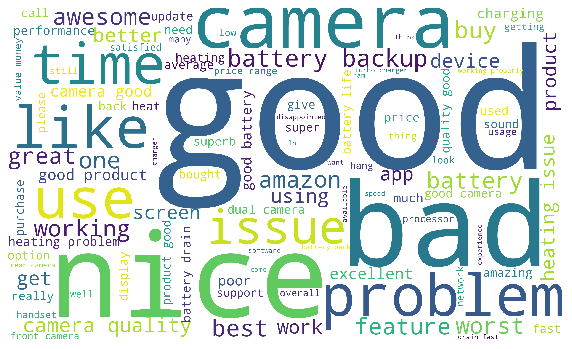

In [100]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Creating a single big_string wich will be used for generating the wordcloud
single = " ".join(words)

# creating wordcloud
wordcloud = WordCloud(stopwords=stp_wrds,width=1000,height=600,scale=3,background_color="white",max_words=100).generate(single)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud)


In [101]:
# creating df and then checking frequency of each word
import numpy as np
df=pd.DataFrame({"words":words})
x=df["words"].value_counts().head(20)

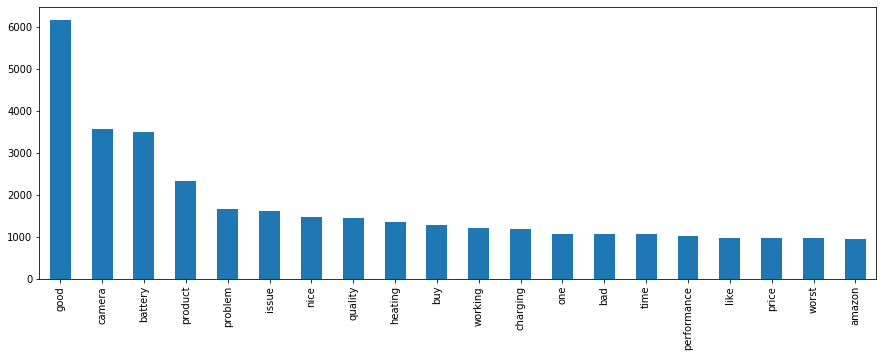

In [102]:
# Plotting the frequency count of the most used words
plt.figure(figsize=(15,5))
x.plot(kind="bar")

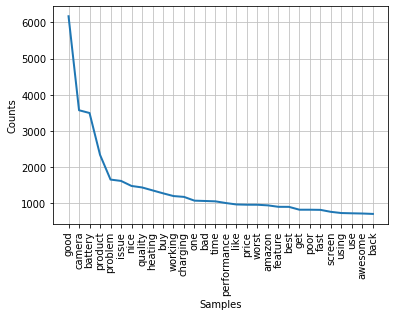

In [103]:
# Counting freq of each word and showing the top 30 words
fdist =nltk.FreqDist(words)
fdist.plot(30,cumulative=False)

In [104]:
# Using TweetTokenizer
TWEET = "I live in #mumbai and #bengaluru is a beautiful place"
from nltk.tokenize import TweetTokenizer , word_tokenize

tw=TweetTokenizer()
wd=word_tokenize(TWEET)
words=tw.tokenize(TWEET)

# These are the words from the above tweet
print("This is tokenizing with TweetTokenizer: ",words)

# As we can see 
print("This is tokenizing without TweetTokenizer: ",wd)


# Just making a list of hashtags
import re
re.findall("#[a-zA-Z]+",TWEET)


This is tokenizing with TweetTokenizer:  ['I', 'live', 'in', '#mumbai', 'and', '#bengaluru', 'is', 'a', 'beautiful', 'place']
This is tokenizing without TweetTokenizer:  ['I', 'live', 'in', '#', 'mumbai', 'and', '#', 'bengaluru', 'is', 'a', 'beautiful', 'place']


['#mumbai', '#bengaluru']

## Stemming:
   - Stemming helps to reduce the no. of distinct words in the corpus.
### Types Of stemming :
   - PorterStemmer
   - SnowballStemmer
   - LancasterStemmer

In [105]:
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer

ps=PorterStemmer()
sn=SnowballStemmer("english")
ln=LancasterStemmer()

text = "This is an example of text in Python while i'am pythonning "
WORDS=  word_tokenize(text)


print("This is o/p of porterstemming: ",[ps.stem(i) for i in WORDS])

print("This is o/p of snowballstemming: ",[sn.stem(i) for i in WORDS])

print("This is o/p of Lancasterstemming: ",[ln.stem(i) for i in WORDS])

This is o/p of porterstemming:  ['thi', 'is', 'an', 'exampl', 'of', 'text', 'in', 'python', 'while', "i'am", 'python']
This is o/p of snowballstemming:  ['this', 'is', 'an', 'exampl', 'of', 'text', 'in', 'python', 'while', "i'am", 'python']
This is o/p of Lancasterstemming:  ['thi', 'is', 'an', 'exampl', 'of', 'text', 'in', 'python', 'whil', "i'am", 'python']


In [107]:
# creating Bag Of words matrix using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features =25,ngram_range=(2,2))
X=cv.fit_transform(sentence).toarray()
X.shape

(14675, 25)

In [108]:
# this shows the index of each words in the array.
cv.vocabulary_

{'battery draining': 4,
 'battery life': 5,
 'backup good': 0,
 'good product': 13,
 'good battery': 11,
 'battery back': 1,
 'heating problem': 15,
 'camera quality': 7,
 'quality good': 17,
 'value money': 22,
 'battery drain': 3,
 'drain fast': 8,
 'battery backup': 2,
 'heating issue': 14,
 'turbo charger': 20,
 'turbo charging': 21,
 'dual camera': 9,
 'waste money': 23,
 'front camera': 10,
 'camera good': 6,
 'price range': 16,
 'working properly': 24,
 'sound quality': 19,
 'good camera': 12,
 'rear camera': 18}

In [109]:
## this is the matrix which will have the words as features and sentence number as row index
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Bag Of Words Matrix  (Document Term Matrix):
   - Creating a dataframe for further analysis
   - Here we have created a bigram dataframe for analysis and  have added the target column at the end.
   - Each column represents the unique bigram of words used in sentences.
   - Each row index represents the sentence number.

In [110]:
amazon_df_CV= pd.DataFrame(X,columns=cv.get_feature_names())
amazon_df_CV["Sentiment"]=reviews["sentiment"]
amazon_df_CV

,backup good,battery back,battery backup,battery drain,battery draining,battery life,camera good,camera quality,drain fast,dual camera,...,price range,quality good,rear camera,sound quality,turbo charger,turbo charging,value money,waste money,working properly,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


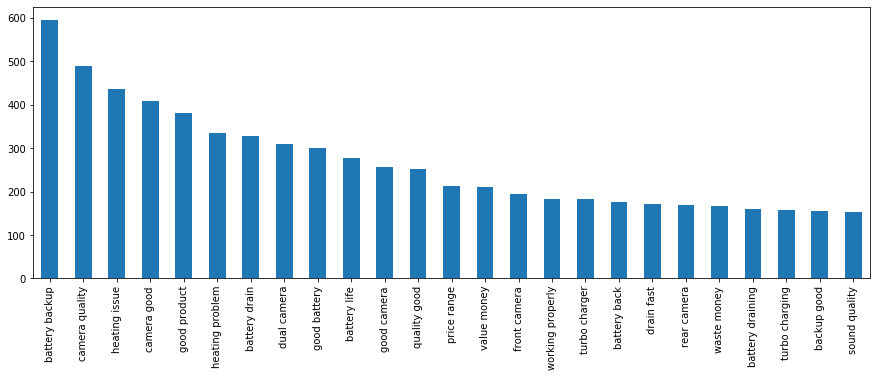

In [111]:
# Plotting the frequency count of the most used bigram words

plt.figure(figsize=(15,5))
amazon_df_CV.drop("Sentiment",axis=1).sum().sort_values(ascending=False).plot(kind="bar")


In [112]:
# Creating TF-IDF Matrix

from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer(max_features=1500,ngram_range=(2,2)) # Here Bigram is used.But if we use (1,3) than all Unique Uni,Bi & Trigrams will be generated
Y= tf.fit_transform(sentence).toarray()
Y.shape

# creating a dataframe & Adding the target variable to the data frame
amazon_df_TF= pd.DataFrame(Y,columns=tf.get_feature_names())
amazon_df_TF["Sentiment"]=reviews["sentiment"]
amazon_df_TF

,able connect,able hear,according price,affordable price,almost hour,amazing camera,amazing feature,amazing product,amazon cheating,amazon customer,...,worth cost,worth every,worth money,worth price,would like,would recommend,would say,writing review,youtube video,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [113]:
# checking the freq of stopwords in the cospus

SW=[]
for i in reviews.review:
    wrds = i.lower()
    wrds = word_tokenize(wrds)
    for j in wrds:
        if j in set(stopwords.words("english")):
            SW.append(j)

            
f= nltk.FreqDist(SW)
f

FreqDist({'is': 10386, 'the': 6526, 'not': 6030, 'and': 5413, 'it': 5375, 'to': 4697, 'i': 4643, 'this': 4547, 'in': 3647, 'very': 3614, ...})

In [114]:
# joining the negation with the words after that

# removing the words no , nor , not from the list of stop words
rem =["not","no","nor"]

for i in stp_wrds:
    if i in rem:
        stp_wrds.remove(i)
stp_wrds    

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [115]:
# Adding clean_reviews to main data set
reviews["clean_reviews"] = sentence
reviews

,sentiment,review,clean_reviews
0,1,Good but need updates and improvements,good need update improvement
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever battery draining like hell b...
2,1,when I will get my 10% cash back.... its alrea...,get cash back already january
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey changed last problem still amaz...
5,0,Only I'm telling don't buyI'm totally disappoi...,telling buyi totally disappointedpoor batteryp...
6,1,"Phone is awesome. But while charging, it heats...",awesome charging heat allot really genuine rea...
7,0,The battery level has worn down,battery level worn
8,0,It's over hitting problems...and phone hanging...,hitting problem hanging problem service statio...
9,0,A lot of glitches dont buy this thing better g...,lot glitch dont buy thing better option


In [116]:
# Loading the affin dictionary

score_data = pd.read_csv("AFFIN.txt",sep="\t")
score_data

,abandon,-2
0,abandoned,-2
1,abandons,-2
2,abducted,-2
3,abduction,-2
4,abductions,-2
5,abhor,-3
6,abhorred,-3
7,abhorrent,-3
8,abhors,-3
9,abilities,2


In [117]:
# defining the function for calculating the sent score

score_d = dict(score_data.values)
score_d

{'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 1,
 'adopts': 1,

In [118]:
#  Calculating the sent_score for each sent
s=[]
for i in reviews.clean_reviews:
    wo = word_tokenize(i)
    score = 0
    for w in wo:
        score+= score_d.get(w,0)
    s.append(score)

In [127]:
# adding the sent_score to the dataset reviews

reviews["sent_score"]=s

In [120]:
# Adding column as sent_pred
reviews["sent_pred_affin"]  = np.where(reviews["sent_score"]>0,1,0)


,sentiment,review,clean_reviews,sent_score,sent_pred_affin
0,1,Good but need updates and improvements,good need update improvement,5,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever battery draining like hell b...,-10,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back already january,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey changed last problem still amaz...,-7,0
5,0,Only I'm telling don't buyI'm totally disappoi...,telling buyi totally disappointedpoor batteryp...,0,0
6,1,"Phone is awesome. But while charging, it heats...",awesome charging heat allot really genuine rea...,1,1
7,0,The battery level has worn down,battery level worn,-1,0
8,0,It's over hitting problems...and phone hanging...,hitting problem hanging problem service statio...,-4,0
9,0,A lot of glitches dont buy this thing better g...,lot glitch dont buy thing better option,2,1


In [121]:
# we are loading the vader_lexicon dictionary
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

# creating a list of compound score 
c_score=[]
for i in reviews.review :
    c_score.append(analyser.polarity_scores(i)["compound"])
    
    
    
reviews["compound_score"]=c_score

In [122]:
reviews["sent_pred_vader"]  = np.where(reviews["compound_score"]>0.35,1,0)

In [123]:
# dataset after deriving new columns
reviews

,sentiment,review,clean_reviews,sent_score,sent_pred_affin,compound_score,sent_pred_vader
0,1,Good but need updates and improvements,good need update improvement,5,1,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever battery draining like hell b...,-10,0,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back already january,0,0,0.0000,0
3,1,Good,good,3,1,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey changed last problem still amaz...,-7,0,-0.8289,0
5,0,Only I'm telling don't buyI'm totally disappoi...,telling buyi totally disappointedpoor batteryp...,0,0,0.0000,0
6,1,"Phone is awesome. But while charging, it heats...",awesome charging heat allot really genuine rea...,1,1,0.1027,0
7,0,The battery level has worn down,battery level worn,-1,0,-0.2960,0
8,0,It's over hitting problems...and phone hanging...,hitting problem hanging problem service statio...,-4,0,-0.4019,0
9,0,A lot of glitches dont buy this thing better g...,lot glitch dont buy thing better option,2,1,0.4404,1


In [124]:
# this is the accuracy score for predicted sent_pred_vader with original sentiment score
accuracy_score(reviews["sent_pred_vader"],reviews["sentiment"])

0.7986371379897785

In [125]:
# this is the accuracy score for predicted sent_pred_affin with original sentiment score
from sklearn.metrics import accuracy_score

accuracy_score(reviews["sent_pred_affin"],reviews["sentiment"])

0.7487563884156729

In [139]:
# creating Bag Of words matrix using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=8888)
I=reviews["clean_reviews"]
D= reviews["sentiment"]


# Here we are deviding the data into train and test 
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(I,D,test_size=0.2)


# then we are fit_transforming the trainx data and transforming the testx data
train_X=cv.fit_transform(trainx)
test_X=cv.transform(testx)

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

mn = MultinomialNB()
mn.fit(train_X,trainy)
y_pred_mn = mn.predict(test_X)
print("confusion matrix for Multinomial: ",confusion_matrix(y_pred_mn,testy),sep="\n")
print("Accuracy Score for Multinomial: ",accuracy_score(y_pred_mn,testy))


log = LogisticRegression()
log.fit(train_X,trainy)
y_pred_log = log.predict(test_X)
print("confusion matrix for Logistic: ",confusion_matrix(y_pred_log,testy),sep="\n")
print("Accuracy Score for Logistic: ",accuracy_score(y_pred_log,testy))

confusion matrix for Multinomial: 
[[1321  222]
 [ 212 1180]]
Accuracy Score for Multinomial:  0.852129471890971
confusion matrix for Logistic: 
[[1312  197]
 [ 221 1205]]
Accuracy Score for Logistic:  0.8575809199318569


D:\anaconda_navi\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
